# Assignment #4: Linear Models and Decision Trees
## Foundations of Machine Learning
## Do Q1 and one other question.
### Advice: Reuse your code and code from lectures, package routine tasks into functions, make plans about how you'll carry out the analysis before jumping into writing code, and work as efficiently as possible

**Q1.** This question is a case study for linear models and decision trees. The data are about car prices. In particular, they include:

  - `Price`, `Color`, `Seating_Capacity`
  - `Body_Type`: crossover, hatchback, muv, sedan, suv 
  - `Make`, `Make_Year`: The brand of car and year produced
  - `Mileage_Run`: The number of miles on the odometer
  - `Fuel_Type`: Diesel or gasoline/petrol
  - `Transmission`, `Transmission_Type`:  speeds and automatic/manual

  1. Load `cars_hw.csv`. These data were really dirty, and I've already cleaned them a significant amount in terms of missing values and other issues, but some issues remain (e.g. outliers, badly scaled variables that require a log or arcsinh transformation). Clean the data however you think is most appropriate.
  2. Summarize the `Price` variable and create a kernel density plot. Use `.groupby()` and `.describe()` to summarize prices by brand (`Make`). Make a grouped kernel density plot by `Make`. Which car brands are the most expensive? What do prices look like in general?
  3. Split the data into an 80% training set and a 20% testing set.
  4. Let's focus on linear models. Make a model where you regress price on the numeric variables alone; what is the $R^2$ and `RMSE` on the test set? Make a second model where, for the categorical variables, make a model comprised of one-hot encoded regressors/features alone, and regress price on those variables; what is the $R^2$ and `RMSE` on the test set? Which model performs better on the test set? Make a third model that combines all the regressors from the previous two; what is the $R^2$ and `RMSE` on the test set? Does the joint model perform better or worse, and by home much?
  5. Use the `PolynomialFeatures` function from `sklearn` to expand the set of numerical variables you're using, along with the categorical variables. As you increase the degree of the expansion, how do the $R^2$ and `RMSE` change? At what point does $R^2$ go negative on the test set? For your best model with expanded features, what is the $R^2$ and `RMSE`? How does it compare to your best model from part 3?
  6. For your best model so far, determine the predicted values for the test data and plot them against the true values. Do the predicted values and true values roughly line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero? Evaluate the strengths and weaknesses of your model.
  7. Now, let's use a regression tree. Construct an appropriate matrix of regressors/features, and fit a tree to the data. Vary the maximum depth of the decision tree using the `max_depth` option (i.e. `tree.DecisionTreeRegressor(max_depth=D)`), and compute the $R^2$ and `RMSE` on the test set of a variety of depths. What depth tree gives the best results?
  8. For your best tree, determine the predicted values for the test data, and plot them against the true values. Do the predicted values and true values line up along the diagonal, or not? Compute the residuals/errors for the test data and create a kernel density plot. Do the residuals look roughly bell-shaped around zero?
  12. Which model --- linear model or classification and regression tree --- has better performance on the test set?

In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Part 1 - Load data
cars_data = pd.read_csv("data/cars_hw.csv")
cars_data = cars_data.drop(columns=["Unnamed: 0"])
cars_data.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000


In [4]:
cars_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 976 entries, 0 to 975
Data columns (total 11 columns):
 #   Column             Non-Null Count  Dtype 
---  ------             --------------  ----- 
 0   Make               976 non-null    object
 1   Make_Year          976 non-null    int64 
 2   Color              976 non-null    object
 3   Body_Type          976 non-null    object
 4   Mileage_Run        976 non-null    int64 
 5   No_of_Owners       976 non-null    object
 6   Seating_Capacity   976 non-null    int64 
 7   Fuel_Type          976 non-null    object
 8   Transmission       976 non-null    object
 9   Transmission_Type  976 non-null    object
 10  Price              976 non-null    int64 
dtypes: int64(4), object(7)
memory usage: 84.0+ KB


In [5]:
# Part 1 - Take arcsinh transformation to rescale variables
cars_data["Price_Scaled"] = np.arcsinh(cars_data["Price"])
cars_data["Mileage_Scaled"] = np.arcsinh(cars_data["Mileage_Run"])
cars_data.head()

,Make,Make_Year,Color,Body_Type,Mileage_Run,No_of_Owners,Seating_Capacity,Fuel_Type,Transmission,Transmission_Type,Price,Price_Scaled,Mileage_Scaled
0,Volkswagen,2017,silver,sedan,44611,1st,5,diesel,7-Speed,Automatic,657000,14.088586,11.398883
1,Hyundai,2016,red,crossover,20305,1st,5,petrol,5-Speed,Manual,682000,14.125932,10.611770
2,Honda,2019,white,suv,29540,2nd,5,petrol,5-Speed,Manual,793000,14.276726,10.986648
3,Renault,2017,bronze,hatchback,35680,1st,5,petrol,5-Speed,Manual,414000,13.626768,11.175493
4,Hyundai,2017,orange,hatchback,25126,1st,5,petrol,5-Speed,Manual,515000,13.845069,10.824806


<Axes: xlabel='Mileage_Scaled', ylabel='Price_Scaled'>

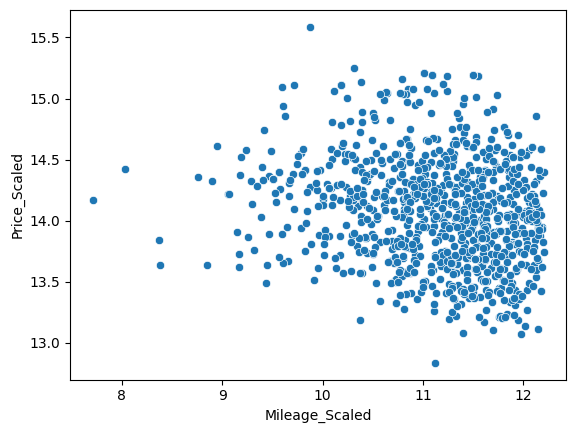

In [6]:
# Part 1 - Identify outliers
sns.scatterplot(data=cars_data,y='Price_Scaled',x='Mileage_Scaled')

<Axes: >

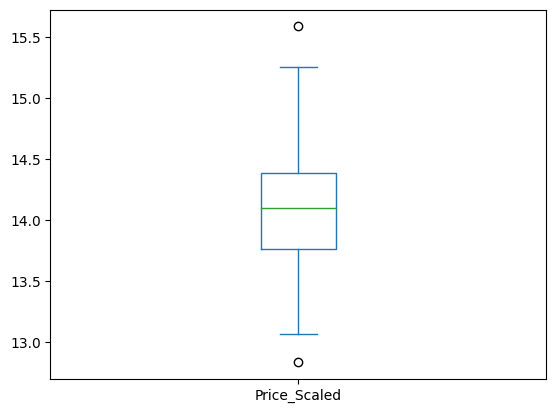

In [7]:
# Part 1 - Identify outliers
cars_data["Price_Scaled"].plot.box() # Not many outliers found with Price, outlier below 13 and outlier above 15.5

<Axes: >

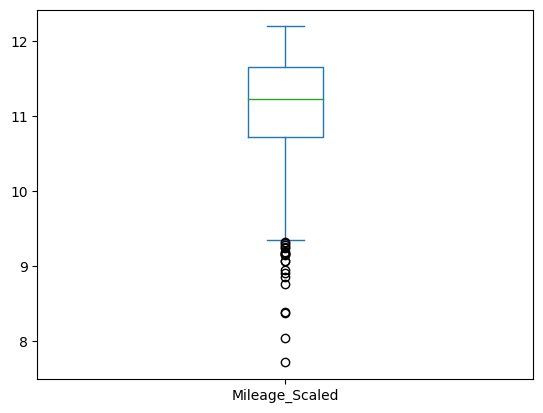

In [8]:
# Part 1 - Identify outliers
cars_data['Mileage_Scaled'].plot.box() # Outliers below 9.5

<Axes: xlabel='Mileage_Scaled', ylabel='Price_Scaled'>

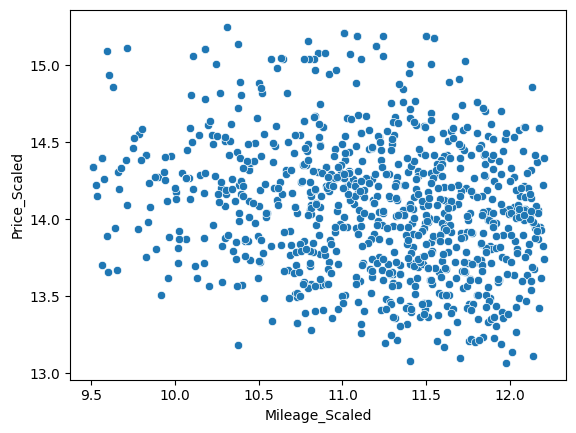

In [9]:
# Part 1 - Drop outliers 
cars_data = cars_data[cars_data['Price_Scaled'].between(13, 15.5)]
cars_data = cars_data.loc[cars_data["Mileage_Scaled"] > 9.5, :]
sns.scatterplot(data=cars_data,y="Price_Scaled",x="Mileage_Scaled")

In [10]:
# Part 2 - Summarize the Price variable
cars_data["Price_Scaled"].describe()

count    944.000000
mean      14.102969
std        0.449124
min       13.068963
25%       13.765795
50%       14.097677
75%       14.384228
max       15.250595
Name: Price_Scaled, dtype: float64

[Text(0.5, 1.0, 'Kernel Density Plot for Price Variable (Scaled)')]

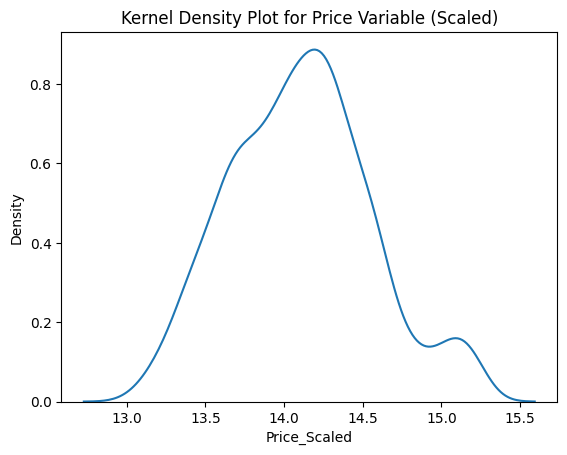

In [11]:
# Part 2 - Kernel density plot for Price variable
sns.kdeplot(data=cars_data, x="Price_Scaled").set(title="Kernel Density Plot for Price Variable (Scaled)")

,count,mean,std,min,25%,50%,75%,max
Make,,,,,,,,
Chevrolet,6.0,13.613042,0.480975,13.188151,13.261539,13.445433,13.864828,14.394369
Datsun,3.0,13.269194,0.036311,13.232114,13.251449,13.270783,13.287734,13.304685
Ford,52.0,14.161427,0.210895,13.270783,14.054527,14.162640,14.269131,14.572571
Honda,73.0,14.229465,0.336972,13.356645,13.965653,14.266586,14.419827,14.938490
Hyundai,301.0,14.057468,0.398902,13.114331,13.782987,14.054527,14.329531,15.063692
Jeep,4.0,14.909738,0.105084,14.763300,14.876417,14.933413,14.966733,15.008827
Kia,8.0,14.985324,0.076877,14.822738,14.965389,14.996253,15.042662,15.063117
MG Motors,35.0,15.132199,0.066263,14.971763,15.088892,15.122762,15.190744,15.211260
Mahindra,18.0,14.592100,0.159906,14.280502,14.544955,14.598828,14.654396,14.890513


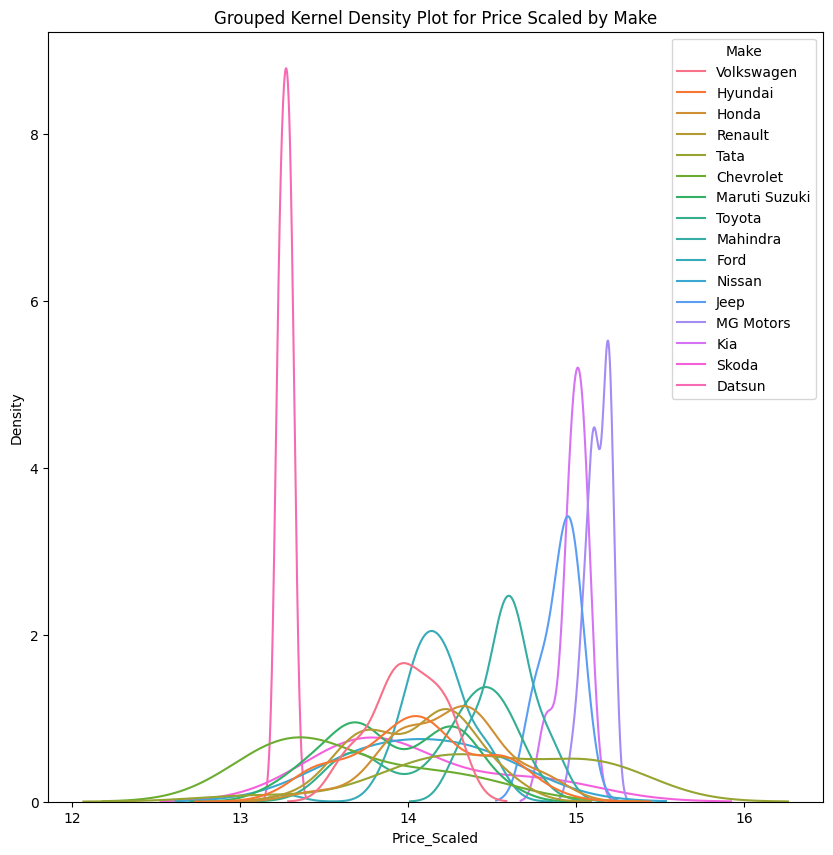

In [12]:
# Part 2 - Summarize prices by brand, grouped kernel density plot for Make
plt.figure(figsize=(10, 10))
sns.kdeplot(data=cars_data, x="Price_Scaled", hue="Make", common_norm=False).set(title="Grouped Kernel Density Plot for Price Scaled by Make")
cars_data.groupby("Make")["Price_Scaled"].describe()

**PART 2 RESPONSE:**\
The car brands that are the more expensive include MG Motors and Kia. In general, it looks like prices are mostly on the higher side for cars brands with a scaled price between 14 and 15.5. An outlier to this would be the car brand Datsun where the majority of prices seem to be around ~13.2 price scaled which is on the lower end of the spectrum (less expensive).

In [13]:
# Part 3 - Split the data into 80% training and 20% testing
from sklearn.model_selection import train_test_split
X = cars_data.drop(columns=["Price_Scaled"])
y = cars_data["Price_Scaled"].copy()
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=.2,random_state=42)

In [14]:
# Part 4 - Regress price on the numeric variables alone
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
from sklearn.metrics import r2_score

X_train_numeric = X_train.select_dtypes(include=["float64", "int64"])
X_test_numeric = X_test.select_dtypes(include=["float64", "int64"])

reg = LinearRegression().fit(X_train_numeric, y_train)
y_pred = reg.predict(X_test_numeric)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred))) 
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.9252869155274176
RMSE on test set: 0.11718610907505893


In [15]:
# Part 4 - Regress price on the categorical variables alone
from sklearn.preprocessing import OneHotEncoder
X_train_categorical = X_train.select_dtypes(exclude=["float64", "int64"])
X_test_categorical = X_test.select_dtypes(exclude=["float64", "int64"])

# One-hot encode the data
encoder = OneHotEncoder(sparse_output=False)
X_train_categorical_encoded = encoder.fit_transform(X_train_categorical)
X_test_categorical_encoded = encoder.transform(X_test_categorical)

reg = LinearRegression().fit(X_train_categorical_encoded, y_train)
y_pred = reg.predict(X_test_categorical_encoded)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred))) 
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.6749322856064333
RMSE on test set: 0.24443574790723724


In [16]:
# Part 4 - Model with combination of the regressors
from sklearn.impute import SimpleImputer
from sklearn.pipeline import Pipeline
from sklearn.preprocessing import StandardScaler

# Separate out numerical data
cars_num = X_train.select_dtypes(include=["float64", "int64"])
cars_cat = X_train.select_dtypes(exclude=["float64", "int64"])

# Transformation pipeline for numerical data
num_pipeline = Pipeline([
    ("imputer", SimpleImputer(strategy = "median")),
    ("std_scaler", StandardScaler()),
])

# Combine with categorical to create full pipeline
from sklearn.compose import ColumnTransformer
num_attribs = list(cars_num)
cat_attribs = list(cars_cat)

full_pipeline = ColumnTransformer([
    ("num", num_pipeline, num_attribs),
    ("cat", OneHotEncoder(handle_unknown = "ignore"), cat_attribs),
])

cars_prepared = full_pipeline.fit_transform(X_train)
X_test_prepared = full_pipeline.transform(X_test)

reg = LinearRegression().fit(cars_prepared, y_train)
y_pred = reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred))) 
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.9712407870710488
RMSE on test set: 0.0727053383096134


**PART 4 RESPONSE:**\
Based on model 1 (numeric variables alone) and model 2 (categorical variables alone), model 1 appears to perform better on the test set with a R2 score of about 0.93 which is closer to 1 than the R2 score of model 2 which was about 0.67. Additionally, the RMSE on model 1 was lower than the the RMSE of model 2 (0.12 < 0.24) which also supports how model 1 appears to perform better than model 2 on the test set.The joint model which combines both the numeric and categorical regressors appears to perform better than both of these models. The R2 score for this model is about 0.97 which is just a bit closer to 1 than model 1. The RMSE for the joint model was also lower than the other two models (0.073 < 0.12 < 0.24).

In [17]:
# Part 5 - Using PolynomialFeatures (degree = 1)
from sklearn.preprocessing import PolynomialFeatures
polynomial = PolynomialFeatures(degree=1)
cars_prepared_poly = polynomial.fit_transform(cars_prepared)
X_test_prepared_poly = polynomial.transform(X_test_prepared)

reg = LinearRegression().fit(cars_prepared_poly, y_train)
y_pred = reg.predict(X_test_prepared_poly)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.9712407866497316
RMSE on test set: 0.07270533884217338


In [18]:
# Part 5 - Using PolynomialFeatures (degree = 2)
polynomial = PolynomialFeatures(degree=2)
cars_prepared_poly = polynomial.fit_transform(cars_prepared)
X_test_prepared_poly = polynomial.transform(X_test_prepared)

reg = LinearRegression().fit(cars_prepared_poly, y_train)
y_pred = reg.predict(X_test_prepared_poly)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.9814836321963033
RMSE on test set: 0.0583385594530896


In [19]:
# Part 5 - Using PolynomialFeatures (degree = 3)
polynomial = PolynomialFeatures(degree=3)
cars_prepared_poly = polynomial.fit_transform(cars_prepared)
X_test_prepared_poly = polynomial.transform(X_test_prepared)

reg = LinearRegression().fit(cars_prepared_poly, y_train)
y_pred = reg.predict(X_test_prepared_poly)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.9894519382088277
RMSE on test set: 0.044031566256257926


In [37]:
# Part 5 - Using PolynomialFeatures (degree = 4)
polynomial = PolynomialFeatures(degree=4)
cars_prepared_poly = polynomial.fit_transform(cars_prepared)
X_test_prepared_poly = polynomial.transform(X_test_prepared)

reg = LinearRegression().fit(cars_prepared_poly, y_train)
y_pred = reg.predict(X_test_prepared_poly)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.9968501759819479
RMSE on test set: 0.024061402974204168


**PART 5 RESPONSE:**\
As you increase the degree of the expansion, the R2 value appears to increase to 1 while the RMSE decreases. Based on the tested degrees (only degrees 1-4 were tested because increasing the degree caused the runtime of each cell to increase exponentially), it appears that there is no point when the R2 value goes negative on the test set since it only continues to converge to 1. For the best model with expanded features (degree of 4), the R2 value is about 0.997 and the RMSE is about 0.024. Compared to the best model from part 4, the model with the expanded features performed even better with its R2 value even closer to 1 and its RMSE even lower.

Text(0.5, 1.0, 'Actual vs. Predicted Car Price Scaled')

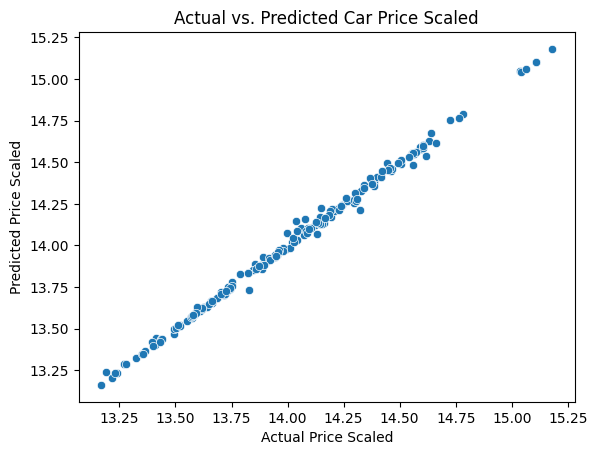

In [ ]:
# Part 6 - Determine predicted values and plot for best model so far
y_pred = reg.predict(X_test_prepared_poly)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price Scaled")
plt.ylabel("Predicted Price Scaled")
plt.title("Actual vs. Predicted Car Price Scaled")

In [ ]:
# Part 6 - Compute residuals/errors for test data
residuals = y_test - y_pred

[Text(0.5, 1.0, 'Kernel Density Plot for Residuals of Linear Model')]

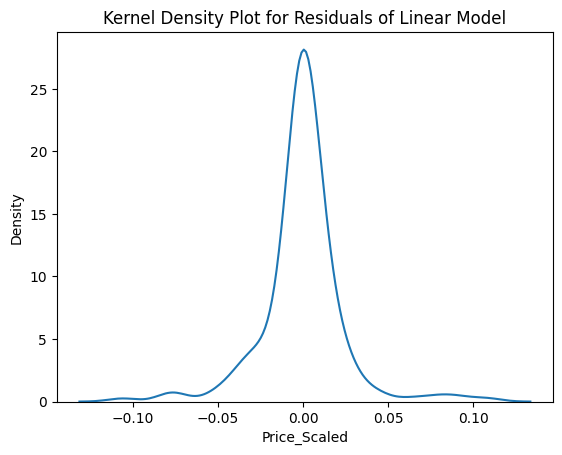

In [ ]:
# Part 6 - Kernel density plot for test data
sns.kdeplot(data=residuals).set(title="Kernel Density Plot for Residuals of Linear Model")

**PART 6 RESPONSE:**\
The predicted values and true values appear to roughly line up along the diagonal when looking at the plot for predicted values vs. true values for the test data. The residuals also appear to look roughly bell-shaped around 0. Some strengths of this model include how they are easily interpreted and can be very powerful for prediction due to its linear nature. However, some weaknesses would be that the model could perform poorly when given data with a nonlinear relationship and having noise in the data may affect how the model fits.

In [ ]:
# Part 7 - Using regression tree (depth = 1)
from sklearn import tree

tree_reg = tree.DecisionTreeRegressor(max_depth=1, random_state=42)
tree_reg = tree_reg.fit(cars_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.6447118763912048
RMSE on test set: 0.2555454464366436


In [ ]:
# Part 7 - Using regression tree (depth = 2)
tree_reg = tree.DecisionTreeRegressor(max_depth=2, random_state=42)
tree_reg = tree_reg.fit(cars_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.884775927878721
RMSE on test set: 0.1455289551441324


In [ ]:
# Part 7 - Using regression tree (depth = 3)
tree_reg = tree.DecisionTreeRegressor(max_depth=3, random_state=42)
tree_reg = tree_reg.fit(cars_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.9707978118419277
RMSE on test set: 0.07326313505831218


In [ ]:
# Part 7 - Using regression tree (depth = 4)
tree_reg = tree.DecisionTreeRegressor(max_depth=4, random_state=42)
tree_reg = tree_reg.fit(cars_prepared, y_train)
y_pred = tree_reg.predict(X_test_prepared)
print("R2 Score on test set: " + str(r2_score(y_test, y_pred)))
print("RMSE on test set: " + str(mean_squared_error(y_test, y_pred, squared=False)))

R2 Score on test set: 0.9925170285481018
RMSE on test set: 0.03708641430634235


**PART 7 RESPONSE:**\
Based on the above descision trees with varying depths, it appears that the tree with a depth of 4 performs the best with an R2 value closest to 1 and the lowest RMSE value.

Text(0.5, 1.0, 'Actual vs. Predicted Price Scaled')

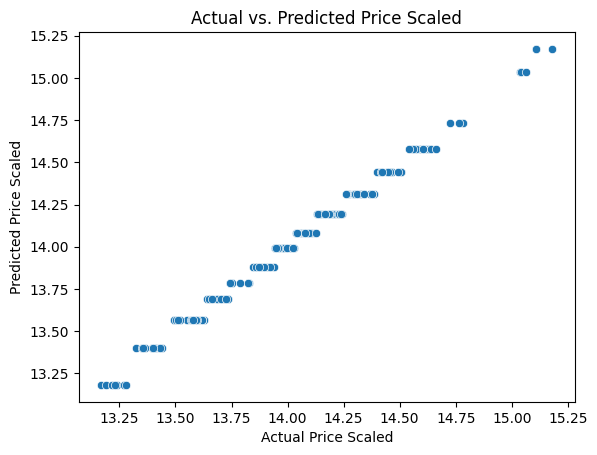

In [ ]:
# Part 8 - Determine predicted values and plot for best tree
y_pred = tree_reg.predict(X_test_prepared)
sns.scatterplot(x=y_test, y=y_pred)
plt.xlabel("Actual Price Scaled")
plt.ylabel("Predicted Price Scaled")
plt.title("Actual vs. Predicted Price Scaled")

In [ ]:
# Part 8 - Compute residual/errors for test data
residuals = y_test - y_pred

[Text(0.5, 1.0, 'Kernel Density Plot for Residuals of Tree Model')]

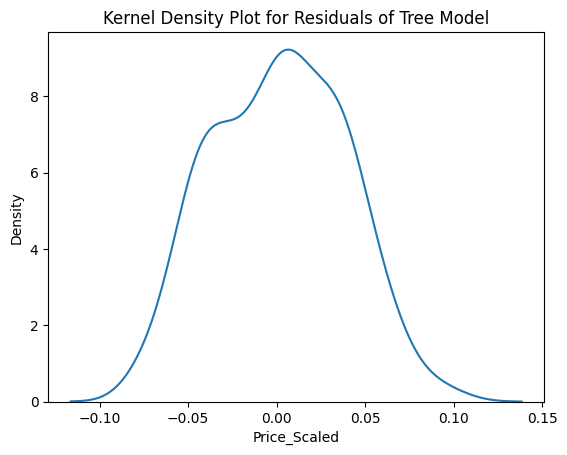

In [ ]:
# Part 8 - Kernel density plot for test data
sns.kdeplot(data=residuals).set(title="Kernel Density Plot for Residuals of Tree Model")

**PART 8 RESPONSE:**\
For my best tree, the predicted values and true values do line up along the diagonal as indicated by the plot above. The residuals do produce a roughly bell-shaped plot around the zero, but it is not as smooth and as well seen compared to the residual plot from the linear model.

**PART 9 RESPONSE:**\
Overall, it appears that the linear model has better peformance on the test set based on the R2 and RMSE values.

**Q2.** The is a question about regression using decision trees and linear models. The data include wages at data science-y jobs, including

  - `Rating`: Company worker happiness score
  - `Size`: Number of employees
  - `Sector`: Part of the economy
  - `avg_salary`: Average wage
  - `job_state`: Location of work

  1. Load the `wages_hw.csv` file. Split the sample into an ~80% training set and a ~20% test set. Do any necessary cleaning, including outliers and missings.
  2. Use a linear model to regress `avg_salary` on `Sector`. Which sectors have the highest predicted wages? What is the $R^2$ and `RMSE` on the test set? 
  3. Make a scatterplot of `avg_salary` and `Rating`. Is there an obvious visual relationship between the two variables? Regress `avg_salary` on `Rating` as a numeric variable: Do higher ratings predict higher or lower wages? Convert `Rating` to a one-hot encoded variable, with a category for each rating. Run a regression of `avg_salary` on the categorical version. How do your results change? Explain. Which version has a higher $R^2$ and lower `RMSE`?
  4. Now interact `Sector` with the categorical version of `Rating`, so your regressors are a (Sector, Rating) pair; this is a programming puzzle you'll have to think about, but using the `.PolynomialFeatures()` function on the one-hot encoded categorical variables is one option, and another is pre-processing a new variable that interacts `Sector` and `Rating` and then one-hot encoding the result. Regress `avg_salary` on the (Sector, Rating) pairs. How does the $R^2$ and `RMSE` on the test set compare to part 2? Interpret the coefficients; which sector-rating pairs have the highest wages?
  5. Run a linear regression of `avg_salary` on all the variables. What is the $R^2$ on the test set? How does it compare to your simpler models in 2--4? 
  6. Build a decision tree by regressing `avg_salary` on `Sector`, `Rating`, and the (Sector, Rating) pairs. What are the $R^2$ and `RMSE` of your models on the test set? How do your answers compare to parts 2, 3, and 4?
  7. Build a decision tree by regressing `avg_salary` on all the other variables. What is the $R^2$ and `RMSE` on the test set?
  8. Build a linear regression or decision tree using the available variables based on your own judgment. What degrees of freedom are you giving the model to predict variation in wages across company and location attributes? What is the $R^2$ and `RMSE` of your model? How does it compare to the previous ones in the question? Why does yours perform better or worse on the test set?

**Q3.** This a question purely on categorical prediction. The data for this happen to be gathered in 1987 in Indonesia, and concern contraceptive method choice. The questions and data-gathering assumptions reflect the culture and attitudes of that time and place, but provide a good example of a categorical prediction problem on an important topic (family planning and maternal health The variables in the data are:

    - Wife's age (numerical)
    - Wife's education (categorical) 1=low, 2, 3, 4=high 
    - Husband's education (categorical) 1=low, 2, 3, 4=high 
    - Number of children ever born (numerical) 
    - Wife's religion (binary) 0=Non-Islam, 1=Islam
    - Wife's now working? (binary) 0=Yes, 1=No
    - Husband's occupation (categorical) 1, 2, 3, 4
    - Standard-of-living index (categorical) 1=low, 2, 3, 4=high
    - Media exposure (binary) 0=Good, 1=Not good
    - Contraceptive method used (class attribute) 1=No-use, 2=Long-term, 3=Short-termhort-term

  1. Load the `contraceptiveMethodChoice.csv` data. Tabulate the `method` variable (i.e. `.value_counts()`). 1 corresponds to `No Contraception`, 3 corresponds to `Short Term` (e.g. condoms, birth control pills), and 2 corresponds to `Long Term` (e.g. IUD, sterilization). Cross tabulate `method` and `numberChildren`. Do couples that use birth control tend to have more children than those who don't?
  2. Split the sample into ~80% training data and ~20% testing data.
  3. We are now going to make a mistake. Train a regression tree to predict the contraceptive method using the other variables in the data, not a classification tree. Look at the terminal nodes in the tree: What values do they take? Does that make sense? Explain clearly what has gone wrong here.
  4. Instead of regression, use a classification tree to predict contraceptive method using the other variables in the data. How does it look different from the previous tree? What variables does the algorithm use? In broad terms, which groups of people are most likely to use each method of contraception?
  5. Compute a confusion matrix for your classification tree on the test set (Hint: There are now three categories instead of two, so the cross tabulation will be a $3 \times 3$ matrix instead of $2 \times 2$.). Compute the Accuracy of your model overall, and the Accuracy for predicting each contraceptive method.
  7. Why can't you use a linear probability model to do this exercise? Explain clearly in words.

**Q4.** This is a question where we use regression and regression trees. The outcome is whether a defendant is held pre-trial in the Virginia justice system. We would like to understand how that outcome is predicted by characteristics of the defendant, particularly race. Let's be very careful/clear: We aren't saying anyone *should* be held without bond or asserting that people with different demographic variables *should* be more likely to be held, but instead trying to predict whether people with different characteristics *are empirically more likely* to be held without bond, given the available information. This is the first step we would take in investigating whether a system is fair, or how large the disparities are: Does it treat people with similar observable characteristics similarly, or not? We are going to look at a common question: Are Black defendants treated differently from white or Asian ones? (There are Native American defendants, but there are 11 in total, which is such a small number of observations that is difficult to clearly say anything about how this group is treated relative to the others.)

The variables in the data are:

  - `held_wo_bail`: Whether a defendant is held without bail before trial (Boolean logical)
  - `race`, `sex`: Categorical demographic variables
  - `is_poor`: Whether the defendant is classified as indigent 
  - `prior_F`, `prior_M`: The number of prior felony and misdemeanor arrests
  - `case_type`: A categorical variable indicating a misdemeanor `M` or felony `F` or infraction `I` or special case `S`
  - `age`: Defendant's age
  - `bond`, `bond_NA`, `bond_type`: The amount of any bond, whether it is missing, and the type
  - `sentence`, `sentence_NA`, `sentence_type`: The length of any sentence, whether it is missing, and the type

1. Load the `pretrial_data.csv` data. Notice that there are `nan`s, but the data are relatively clean. Because there are `.nan`s among variables you won't use, you'll want to narrow down your analysis to the relevant variables before dropping or imputing missing values.
2. Create a dummy variable indicating that the defendant is Black.
3. Regress `held` on `Black`. What is the slope coefficient Interpret the coefficient on the Black dummy variable: How much more likely is a black person to be held without bail? What is the $R^2$ of the model?
4. Before doing this question, please think for a few minutes about how to make the process of running these regressions as efficient as possible, before jumping into writing code. Repeat part 2, for the following specifications, keeping track of the coefficient on the Black dummy variable each time:
      - `held` on `Black` and `sex`
      - `held` on `Black` and `sex` and `is_poor`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F`
      - `held` on `Black` and `sex` and `is_poor` and `prior_F` and `case_type`
What happens to the coefficient on the Black dummy variable as you include more regressors/features/controls in the regression? Explain your findings.
5. Suppose we don't want to see just `Black` and `sex`, but `Black` interacted with `sex`: Are Black men and Black women treated systemically differently from the rest of the population? Implement this in a regression, and explain your findings.
6. Imagine someone argued we should use these kinds of models to help a judge or magistrate make bail decisions (you could obviously go back and make this kind of model for the bond and sentence variables, then deploy it on new cases to predict what their bond and sentence values would be). What concerns would you have? Do you think society should be using data-driven and automated tools like that? Explain your concerns clearly.

In [22]:
# Part 1 - Load the data
pretrial_data = pd.read_csv("data/pretrial_data.csv")
pretrial_data = pretrial_data.drop(columns=["Unnamed: 0"])
pretrial_data.head()

,case_type,age,sex,race,is_poor,bond,bond_type,prior_F,prior_M,gini,released,sentence_type,sentence,bond_NA,held_wo_bail,sentence_NA
0,F,31.0,M,W,NaN,NaN,7,0.0,0.0,0.44,NaN,NaN,NaN,True,False,True
1,F,60.0,M,B,NaN,NaN,7,13.0,21.0,0.44,0.0,0.0,60.000000,True,False,False
2,M,27.0,M,W,NaN,NaN,7,0.0,0.0,0.44,0.0,1.0,12.000000,True,False,False
3,M,27.0,M,B,0.0,NaN,7,0.0,9.0,0.44,0.0,1.0,0.985626,True,False,False
4,F,28.0,F,W,0.0,NaN,7,0.0,0.0,0.44,1.0,4.0,0.000000,True,False,True


In [23]:
# Part 1 - Select relevant variables
pretrial_data = pretrial_data.drop(columns=["age", "bond", "bond_type", "bond_NA", "gini", "released", "sentence_type", "sentence", "sentence_NA"])
pretrial_data.head()

,case_type,sex,race,is_poor,prior_F,prior_M,held_wo_bail
0,F,M,W,NaN,0.0,0.0,False
1,F,M,B,NaN,13.0,21.0,False
2,M,M,W,NaN,0.0,0.0,False
3,M,M,B,0.0,0.0,9.0,False
4,F,F,W,0.0,0.0,0.0,False


In [24]:
# Part 1 - Drop out rows with NaN
pretrial_data = pretrial_data.dropna(axis=0)
pretrial_data.head()

,case_type,sex,race,is_poor,prior_F,prior_M,held_wo_bail
3,M,M,B,0.0,0.0,9.0,False
4,F,F,W,0.0,0.0,0.0,False
5,M,M,B,0.0,1.0,0.0,False
6,F,F,B,1.0,0.0,0.0,False
7,M,M,B,0.0,0.0,0.0,False


In [25]:
# Part 2 - Dummy variable for Black
pretrial_data['is_black'] = (pretrial_data['race'] == 'B').astype(int)
pretrial_data.head()

,case_type,sex,race,is_poor,prior_F,prior_M,held_wo_bail,is_black
3,M,M,B,0.0,0.0,9.0,False,1
4,F,F,W,0.0,0.0,0.0,False,0
5,M,M,B,0.0,1.0,0.0,False,1
6,F,F,B,1.0,0.0,0.0,False,1
7,M,M,B,0.0,0.0,0.0,False,1


In [26]:
# Part 3 - Regress held on Black (using Logistic Regression because it produced the best R2 score of models attempted)
from sklearn.linear_model import LogisticRegression
X = pretrial_data["is_black"].values.reshape(-1, 1).astype(int)
y = pretrial_data["held_wo_bail"].astype(int)

reg = LogisticRegression()
reg.fit(X, y)

reg_coef = reg.coef_[0][0]
reg_r2 = reg.score(X, y)

print("Coefficient: " + str(reg_coef))
print("R2 Score: " + str(reg_r2))

Coefficient: 0.3368207545819244
R2 Score: 0.7336913378473033


**PART 3 RESPONSE:**\
The coefficient from this regression is about 0.34. To interpret the coefficient, it is about 30% more likely for a black person to be held without bail. The R2 value of this model is about 0.73 which is somewhat close to 1.

In [34]:
# Part 4 - Regressions on the following specifications
pretrial_data["is_male"] = (pretrial_data['sex'] == 'M').astype(int)
pretrial_data["is_female"] = (pretrial_data['sex'] == 'F').astype(int)

specifications = [
    ['is_black', 'sex'],
    ['is_black', 'sex', 'is_poor'],
    ['is_black', 'sex', 'is_poor', 'prior_F'],
    ['is_black', 'sex', 'is_poor', 'prior_F', 'case_type']
]

for spec in specifications:
    X = pd.get_dummies(pretrial_data[spec].fillna(0))
    reg = LogisticRegression()
    reg.fit(X, y)

    reg_coef = reg.coef_[0][0]
    reg_r2 = reg.score(X, y)

    print("Coefficient for is_black for" + str(spec) + ": " + str(reg_coef))
    print("R2 Score for " + str(spec) + ": " + str(reg_r2))
    print()


Coefficient for is_black for['is_black', 'sex']: 0.31227798853239563
R2 Score for ['is_black', 'sex']: 0.7336913378473033

Coefficient for is_black for['is_black', 'sex', 'is_poor']: 0.18117152875892734
R2 Score for ['is_black', 'sex', 'is_poor']: 0.7336913378473033

Coefficient for is_black for['is_black', 'sex', 'is_poor', 'prior_F']: 0.12707653599141935
R2 Score for ['is_black', 'sex', 'is_poor', 'prior_F']: 0.7458790567359328

Coefficient for is_black for['is_black', 'sex', 'is_poor', 'prior_F', 'case_type']: 0.12640814115070845
R2 Score for ['is_black', 'sex', 'is_poor', 'prior_F', 'case_type']: 0.7901937893999533



**PART 4 RESPONSE:**\
When you add more regressors, the coefficient on the Black dummy variable appears to decrease. With only two features (is_black and sex), the coefficient is about 0.31. As more features are added on, the coefficient on the Black dummy variable decreases to about 0.12. These findings suggest that when more factors come into play, the weight or influence of the is_black variable on the result on being held without bail is decreased. However, when only looking at the is_black and sex variable, the is_black variable has a heavier/more influence on whether or not someone is held without bail.


In [35]:
# Part 5 - Black interacted with sex (male)
pretrial_data["black_male"] = pretrial_data["is_black"] & pretrial_data["is_male"]
pretrial_data["black_female"] = pretrial_data["is_black"] & pretrial_data["is_female"]

X = pretrial_data["black_male"].values.reshape(-1, 1).astype(int)
y = pretrial_data["held_wo_bail"].astype(int)

reg = LogisticRegression()
reg.fit(X, y)

reg_coef = reg.coef_[0][0]
reg_r2 = reg.score(X, y)

print("Coefficient: " + str(reg_coef))
print("R2 Score: " + str(reg_r2))

Coefficient: 0.5816596354872413
R2 Score: 0.7336913378473033


In [36]:
# Part 5 - Black interacted with sex (female)
X = pretrial_data["black_female"].values.reshape(-1, 1).astype(int)
y = pretrial_data["held_wo_bail"].astype(int)

reg = LogisticRegression()
reg.fit(X, y)

reg_coef = reg.coef_[0][0]
reg_r2 = reg.score(X, y)

print("Coefficient: " + str(reg_coef))
print("R2 Score: " + str(reg_r2))

Coefficient: -0.5897593381668639
R2 Score: 0.7336913378473033


**PART 5 RESPONSE:**\
Based on the results of the regressions above, there do appear to be systematic differences between how Black men and Black women are treated from the rest of the population. The coefficient for Black men (about 0.59) indicates that there is a pretty heavy weight/influence on how much being a black man influences being held without bail. With the positive coefficient, this means that if you're a black male, you're more likely to be held without bail. On the other hand, the coefficient for Black women is negative (about -0.59). This shows that the if you're a black female, you're less likely to be held without bail.

**PART 6 RESPONSE:**\
If someone argued that we should use these kinds of models to help a judge or magistrate make bail decisions, I would be concerned about how many features/regressors they would use to perform the regression and develop the model. As we can see from our analysis, when we had more features besides just is_black and sex, the coefficient on the Black dummy variable decreased suggesting that the influence of that variable on the prediction is not as high as what we originally saw. Therefore, there are many other features that go into determining whether or not someone should be held without bail. If these kinds of models were built without having many regressors, then someone could easily say that because of a certain race or gender that the model assigns a greater coefficient to, they can make those bail decisions without looking at the bigger picture and context of the problem. As such, I think there are times when data-driven and automated tools like this as they can help us make more informed decisions such as when hoping to purchase a home or car or predict on features relevant to medical problems. However, for use cases that involve race, gender, etc. having data-driven and automated tools to make decisions could lead to greater prejudice against certain groups of people and tear our society apart.

**Q5.** This is a math question to review the derivation of the OLS estimator (but only if you are into that kind of thing!). We are going to do it slightly differently from what we did in class, though. We will use a linear predictor and minimize the Sum of Squared Errors, just as in class. But, we are going to de-mean $X$ first, creating another variable $z_i = x_i - \bar{x}$ where 
$$
\bar{x} = \dfrac{1}{N} \sum_{i=1}^N x_i,
$$
so the model is $\hat{y}_i = a + b z_i$ and the `SSE` is
$$
\text{SSE}(a,b) = \sum_{i=1}^N (y_i - a - bz_i)^2.
$$

  1. Take partial derivatives of the `SSE` with respect to $a$ and $b$. You should get

\begin{eqnarray*}
\sum_{i=1}^N -2(y_i - a- bz_i) &=& 0 \\
\sum_{i=1}^N -2(y_i - a - bz_i)z_i &=& 0.
\end{eqnarray*}

  2. Solve for the solutions to the above equations. Big hint: $\bar{z} = 0$, since we subtracted the mean of $x$ from $x$ to get $z$. You should get

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})z_i}{\sum_{i=1}^N z_i^2}.
\end{eqnarray*}

  3. Substitute $z_i = x_i - \bar{x}$ back into the above equations. You should get
  
\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\sum_{i=1}^N(y_i - \bar{y})(x_i-\bar{x})}{\sum_{i=1}^N (x_i-\bar{x})^2},
\end{eqnarray*}

which can be written in terms of sample covariance and sample variance as:

\begin{eqnarray*}
a^* &=& \bar{y} \\
b^* &=& \dfrac{\text{cov}(x,y)}{\text{var}(x)}.
\end{eqnarray*}

This is typically the preferred way of expressing the OLS coefficients.

4. When will $b^*$ be large or small, depending on the relationship between $x$ and $y$ and the amount of "noise"/variance in $x$? What does $a^*$ represent?
5. Suppose you have measurement error in $x$ which artificially inflates its variance (e.g. bad data cleaning). What happens to the $b^*$ coefficient? How will affect your ability to predict? (This phenomenon is called **attenuation**.)
6. Let's return to the question of *outliers*. With your formula for the OLS coefficients $(a^*,b^*)$, explain what happens if you significantly increase a single value of the outcome/target/response variable $y_i$ or one of the predictor/explanatory/covariate variables $x_i$. If values for some extreme observations are exerting significant influence over the regression coefficients, will the model perform well on for more average observations?